In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
print(os.listdir('input'))

['.DS_Store', 'test.csv', 'train.csv', 'sample_submission.csv']


In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

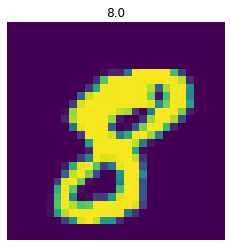

In [32]:
train = pd.read_csv(r'input/train.csv', dtype=np.float32)

targets_numpy = train.label.values
features_numpy = train.loc[:, train.columns != 'label'].values/255 # normalization

features_train, features_test, targets_train, targets_test = train_test_split(
    features_numpy, targets_numpy, test_size=0.2, random_state=42)

# create feature and targets tensor for train set.
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train)/batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28, 28))
plt.axis('off')
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [33]:
# Create RNN Model